In [6]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt



# Defino la estacion y el tiempo

In [7]:
est = '87585'
año = '2019'
mes = ['06','07'] #mes de inicio y final
dia = ['26','25'] #dia inicio y final
hora = ['01','02'] #hora inicio y final

# API para cargar los datos

### Si da 200 esta bien

In [8]:
url = 'https://www.ogimet.com/display_synops2.php?lugar=%s&tipo=ALL&ord=REV&nil=SI&fmt=html&ano=%s&mes=%s&day=%s&hora=%s&anof=%s&mesf=%s&dayf=%s&horaf=%s&enviar=Ver'
            %(est,año,mes[0],dia[0],hora[0],año,mes[1],day[1],hora[1])                     
response = requests.get(url)
display(response)
soup = BeautifulSoup (response.text, 'html.parser')


<Response [200]>

## Diccionario de estaciones, agregar país y estación según sea necesario

In [9]:
reg = {
    '87' : 'Argentina'
}
estaciones= {
    '585' : 'Observatorio Central'
    
}

# Scrap de los Synop

In [19]:
synops =  soup.find_all(('pre'))

T = []
Td = []
dia = []
hora = []
pais = reg[est[:2]]
estacion = estaciones[est[2:]]

# Un Ejemplo

print("Metadata ",synops[0])
print("Información importante ",synops[1])

for i in range(len(synops)):
    
   
    if (i+1) % 2 ==0:
    
        # Es horrible pero funciona, ya lo haré más lindo
        a  = str(synops[i]).split(' ')
        a[0] = str(a[0])[5:]
        a[-1] = str(a[-1])[:-7]
        a = np.append(a[:9],a[-3:])
        a[8] = str (a[8])[:-3]
        #######################
        
        # Cargo pais y estación
        pais = reg[str(a[0][:2])]
        estacion = estaciones[str(a[0][2:])]
        
        # a es la lista de fracciones del synop
        
        # Cargo T
        st = int(a[3][1])
        T.append(((-1)**st)*int(str(a[3][-3:]))/10)
        
        # Cargo Td
        std = int(a[4][1])
        Td.append(((-1)**std)*int(str(a[4][-3:]))/10)
        
        # Se puede seguir cargando otras cosas aca
        
    else:
        
        ## Cargo la metadata, fecha, hr etc
        meta= str(synops[i]).split(' ')
        meta[0] = str(meta[0])[5:]
        meta[1] = str(meta[1])[:-7]
        d = meta[1][:2]
        h = meta[1][2:]
        dia.append(d)

        hora.append(h)
        
        


Metadata  <pre>AAXX 25024</pre>
Información importante  <pre>87585 42960 80905 10101 20048 30266 40297 58004 80007
      333 56007 88270=</pre>


## Grafico de la T y Td

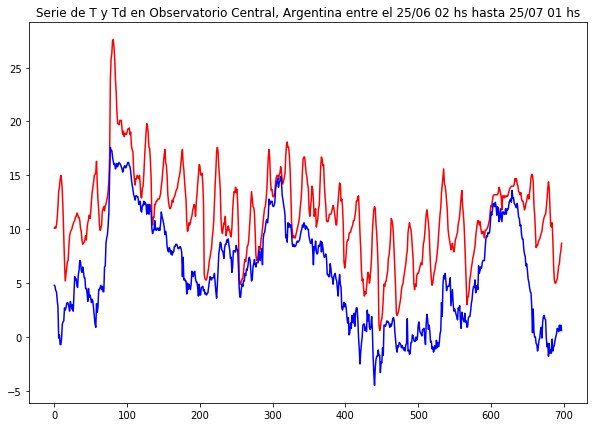

In [27]:
fig = plt.figure(figsize=(10,7))
plt.plot(T, c= 'r')
plt.plot(Td, c = 'b')

plt.title('Serie de T y Td en %s, %s entre el %s/%s %s hs hasta %s/%s %s hs'
          %(estacion, pais ,dia[0],mes[0],hora[0],dia[1],mes[1],hora[1]))

plt.show()

## A partir de aca es ir agregando variables, a mi no me funcionó bien con mas de 30 días, los datos son de  a 1 hr

In [12]:
import pandas as pd

df = pd.DataFrame(T)

df.to_csv(r'T.csv')

In [13]:
    dia = str(meta[1])[:2]
    hora = str(meta[1])[-2:]
    print('Dia: {}, hora: {}'.format(dia,hora))


    pais = reg[str(a[0][:2])]
    estacion = estaciones[str(a[0][2:])]

    T = int(str(a[3][-3:]))/10
    Td = int(str(a[4][-3:]))/10
    Td

Dia: 26, hora: 01


0.6